In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('../Dataset/netflix_titles.csv')

In [3]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,24.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,24.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0


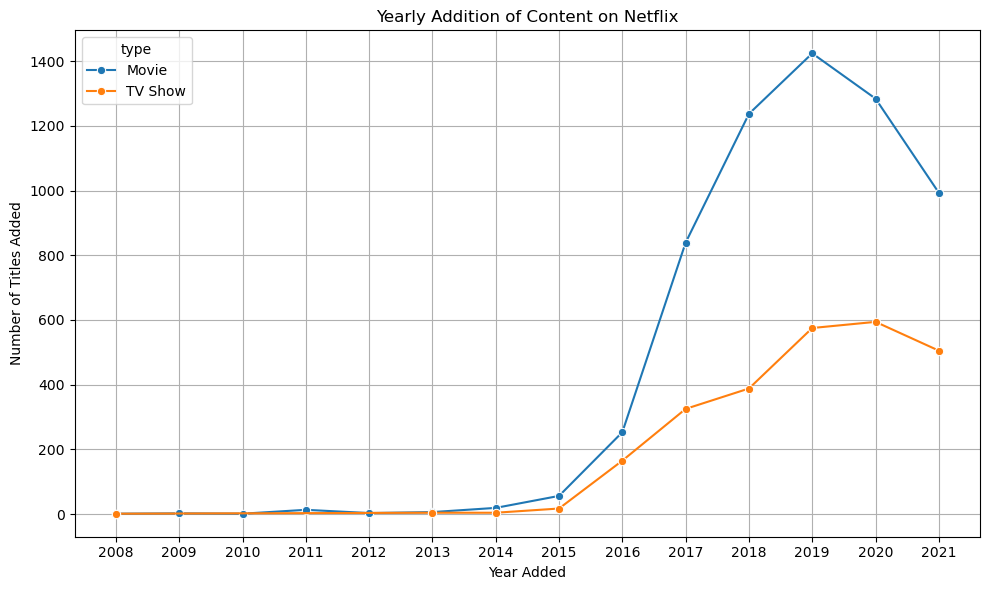

In [5]:
yearly_content=df.groupby(['year_added','type']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_content, x='year_added', y='count', hue='type',marker="o")
plt.title('Yearly Addition of Content on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(yearly_content['year_added'].unique())
plt.grid()
plt.tight_layout()
plt.savefig('yearly_addition_netflix.png')

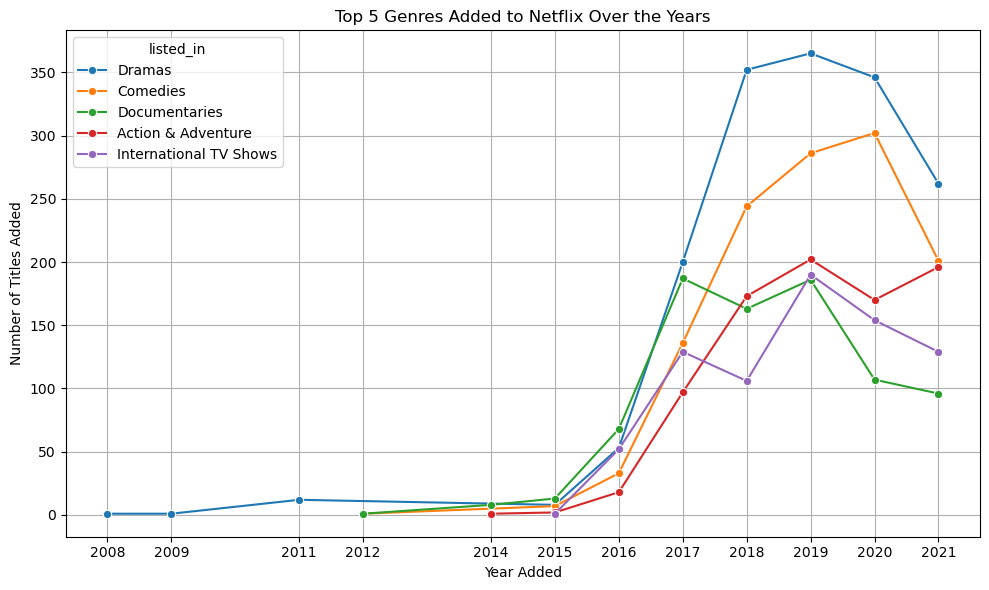

In [6]:
df['listed_in']=df['listed_in'].str.split(',').str[0]
genre_trend=df.groupby(['year_added','listed_in']).size().reset_index(name='count')
top_genres=genre_trend.groupby('listed_in')['count'].sum().nlargest(5).index
top_genre_trend=genre_trend[genre_trend['listed_in'].isin(top_genres)]

plt.figure(figsize=(10,6))
sns.lineplot(data=top_genre_trend, x='year_added', y='count', hue='listed_in', marker="o")
plt.title('Top 5 Genres Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(top_genre_trend['year_added'].unique())
plt.grid()
plt.tight_layout()
plt.savefig('top_genres_netflix.png')


“Netflix saw rapid content expansion after 2015, with Movies consistently leading, but TV Shows growing faster post-2018.”